In [519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
pd.options.mode.chained_assignment = None

In [520]:
df = pd.read_csv(r'C:\Users\miboj\Downloads\diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [521]:
df.shape


(768, 9)

In [537]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values
df.describe().T # Printer en beskrivelse af dataene

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


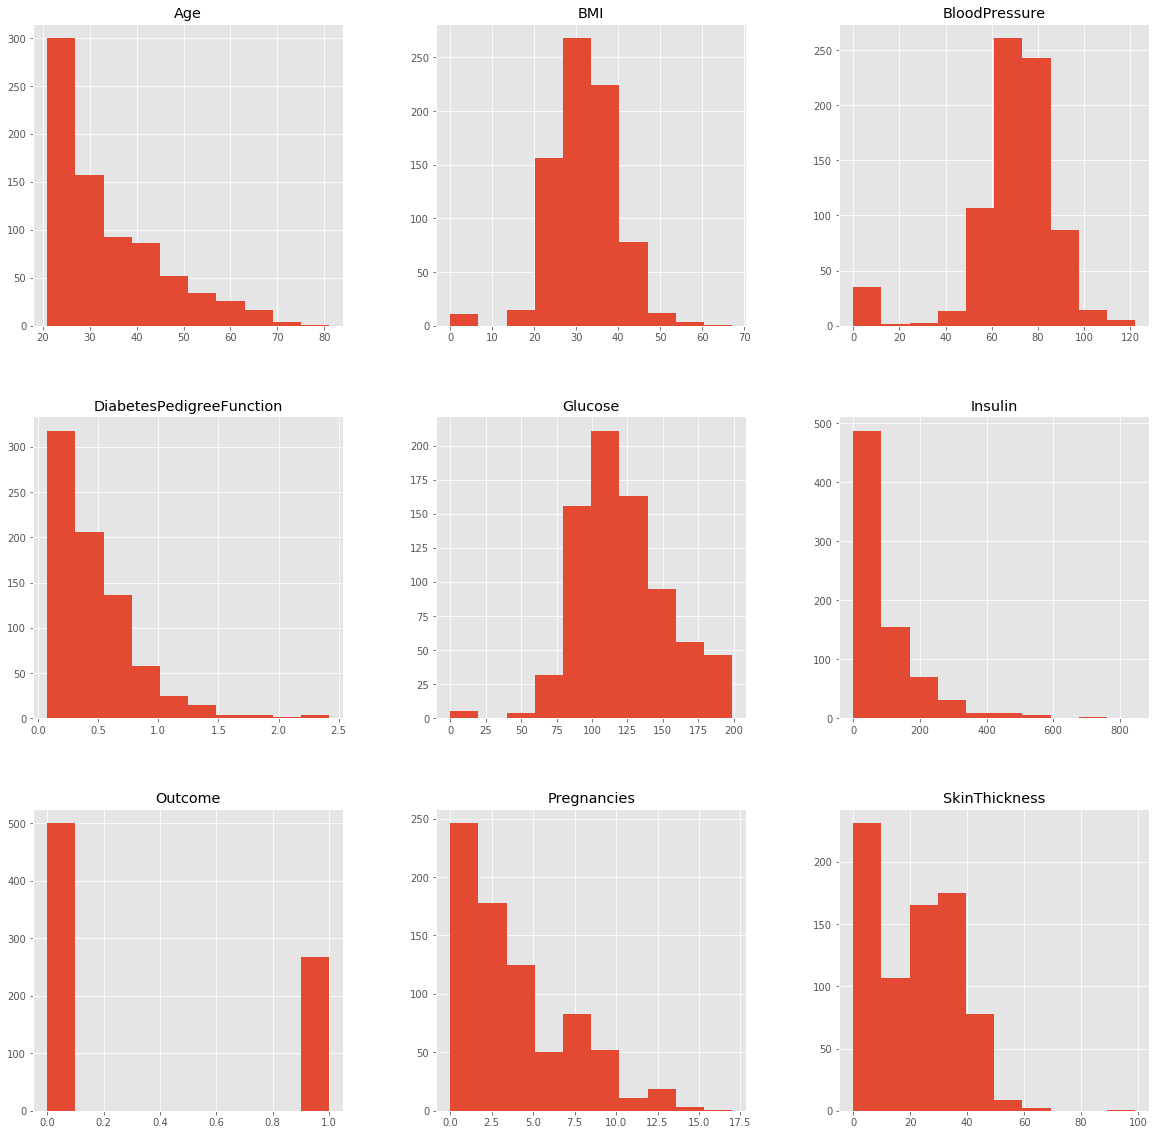

In [538]:
p = df.hist(figsize = (20,20)) #ERHMAGERD BEST FUNCTION EVER!

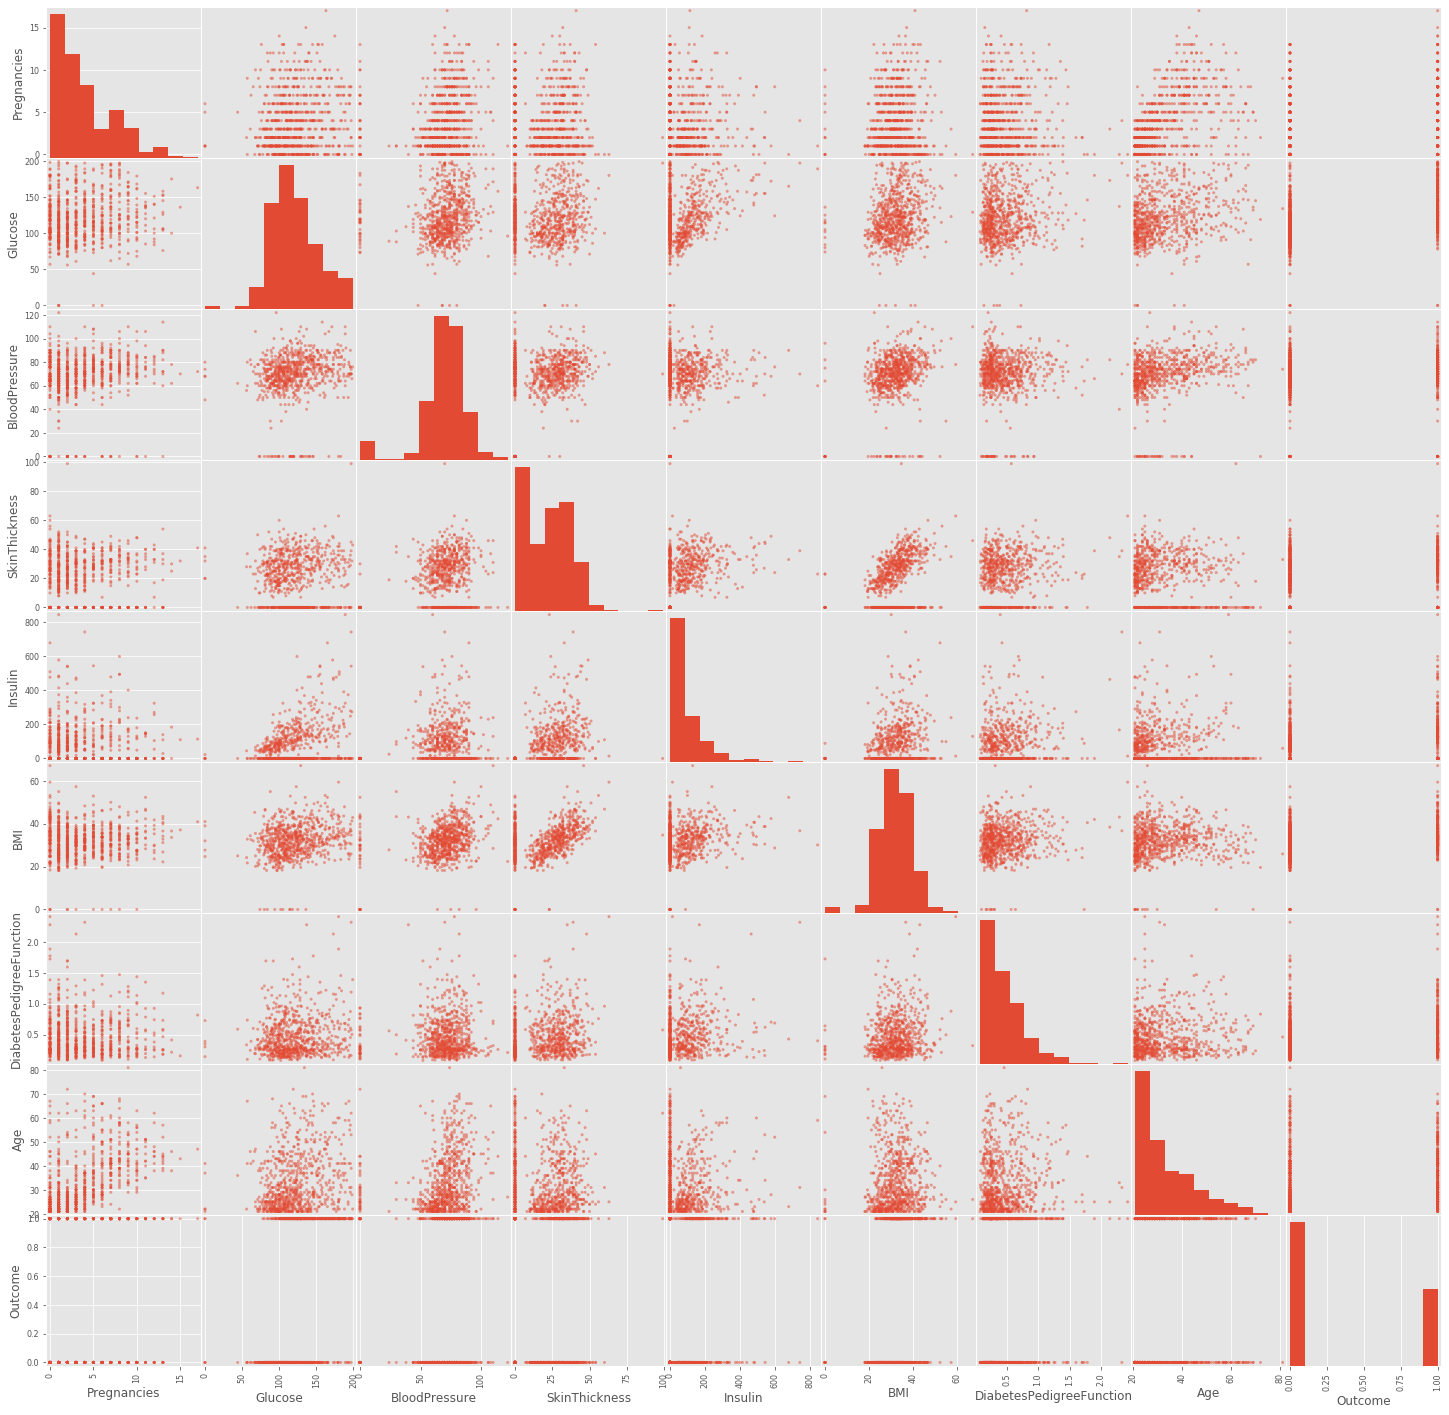

In [540]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))

In [523]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0, stratify=y)

In [524]:
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Tester for optimale antal af neighbors
for i,k in enumerate(neighbors):
    #Modellen vælges her Asbjørn!
    knn = KNeighborsClassifier(n_neighbors=k)
    #Data gives til modellen
    knn.fit(X_train, y_train)
    #Udregn accuracy på trænings sættet
    train_accuracy[i] = knn.score(X_train, y_train)
    #Udreng accuracy på test sættet
    test_accuracy[i] = knn.score(X_test, y_test) 

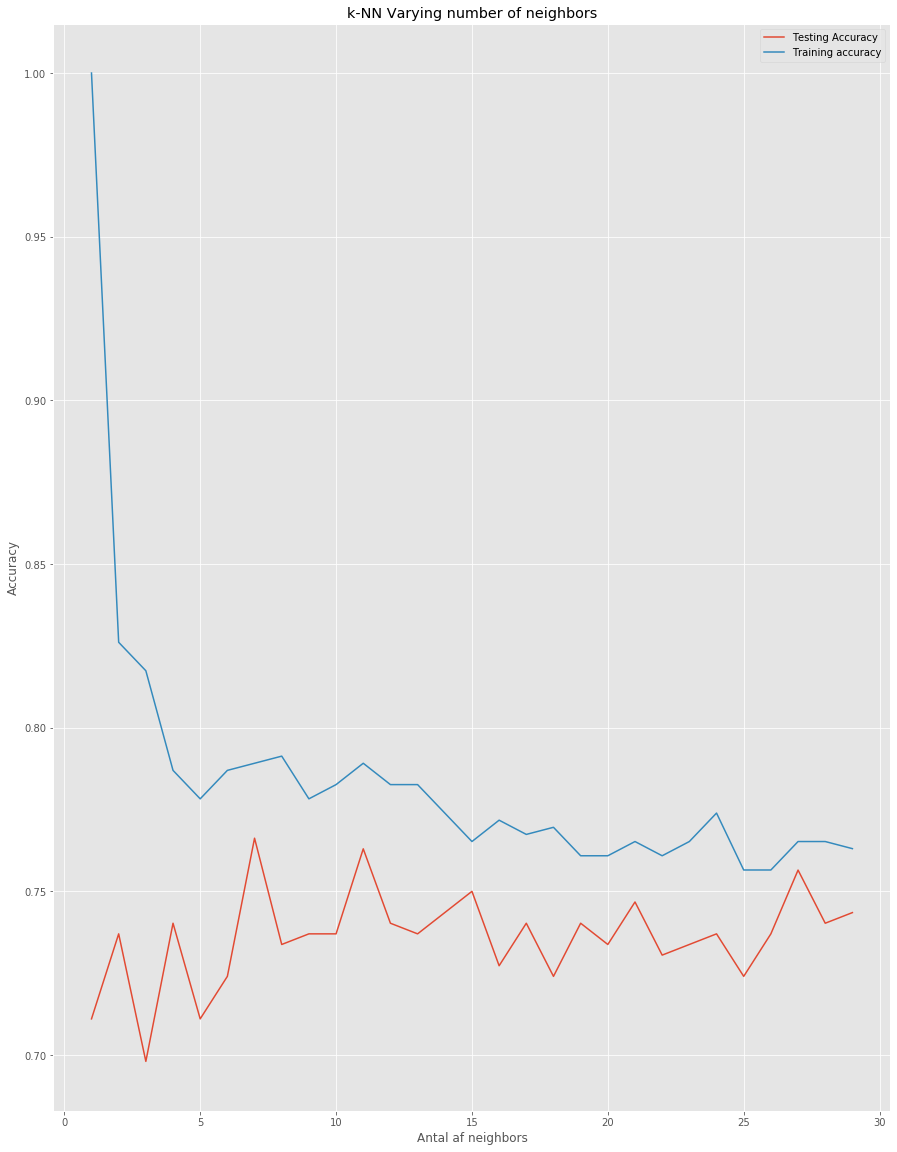

In [525]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Antal af neighbors')
plt.ylabel('Accuracy')
plt.show()

Vi observere den optimale mængde af neighbors (nogle siger at en tommelfinger regl er kvadratroden af rows i data sættet)

In [526]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [527]:
knn.score(X_test,y_test)

0.7662337662337663

In [528]:
#Confusion matrix - YAAAY!
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[173  28]
 [ 44  63]]


True negative = venstre top
<br>
True positive = venstre bund
<br>
False positive = højre top
<br>
False negative = højre bund

In [529]:

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.7972350230414746
Specificity :  0.6923076923076923


In [530]:
def predictions(patient_nr):
    pred = knn.predict(X_test[patient_nr-1:patient_nr])
    str_pred = 'Diabetis' if pred == 1 else 'Ikke Diabetis'
    fact = y_test.item(patient_nr)
    str_fact = 'Diabetis' if fact == 1 else 'Ikke Diabetis'
    #print(knn.predict(X_test[:patient_nr]))
    pred_values = X_test[patient_nr:]
    col = pd.DataFrame({"Pregnancies": pred_values[0][0], "Glucose": pred_values[0][1], "BloodPressure": pred_values[0][2],
          "SkinThickness": pred_values[0][3], "Insulin": pred_values[0][4], "BMI": pred_values[0][5],
          "DiabetesPedigreeFunction": pred_values[0][6], "Age": pred_values[0][7]}, index=[0])
    #df = pd.DataFrame.from_dict(col.items())
    return col, str_pred, str_fact

In [531]:
error_list = []
for i, e in enumerate(X1_test):
    if i == 0:
        continue
    b = predictions(i)
    if b[1] != b[2]:
        temp = {"patient_nr": i, "Prediction": b[1], "Actual": b[2]}
        error_list.append(temp)
    else:
        continue
        

In [532]:
edf = pd.DataFrame(error_list)
pd.set_option('display.max_rows', None)
display(edf)

,patient_nr,Prediction,Actual
0,1,Diabetis,Ikke Diabetis
1,2,Ikke Diabetis,Diabetis
2,3,Diabetis,Ikke Diabetis
3,6,Ikke Diabetis,Diabetis
4,8,Ikke Diabetis,Diabetis
5,11,Ikke Diabetis,Diabetis
6,16,Ikke Diabetis,Diabetis
7,17,Diabetis,Ikke Diabetis
8,18,Ikke Diabetis,Diabetis
9,20,Ikke Diabetis,Diabetis


In [533]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       201
           1       0.69      0.59      0.64       107

    accuracy                           0.77       308
   macro avg       0.74      0.72      0.73       308
weighted avg       0.76      0.77      0.76       308



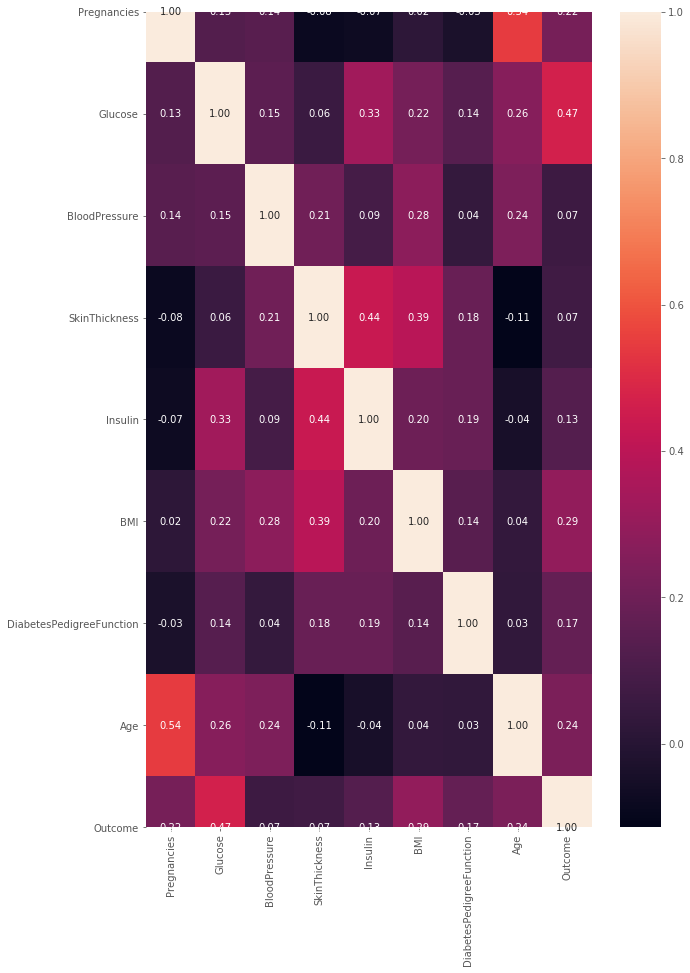

In [534]:
import seaborn as sns
from pylab import rcParams
def plot_correlation_matrix(data):
    rcParams['figure.figsize'] = 10, 15
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')

# load your data 
data  = df

# plot correlation & densities
plot_correlation_matrix(data)


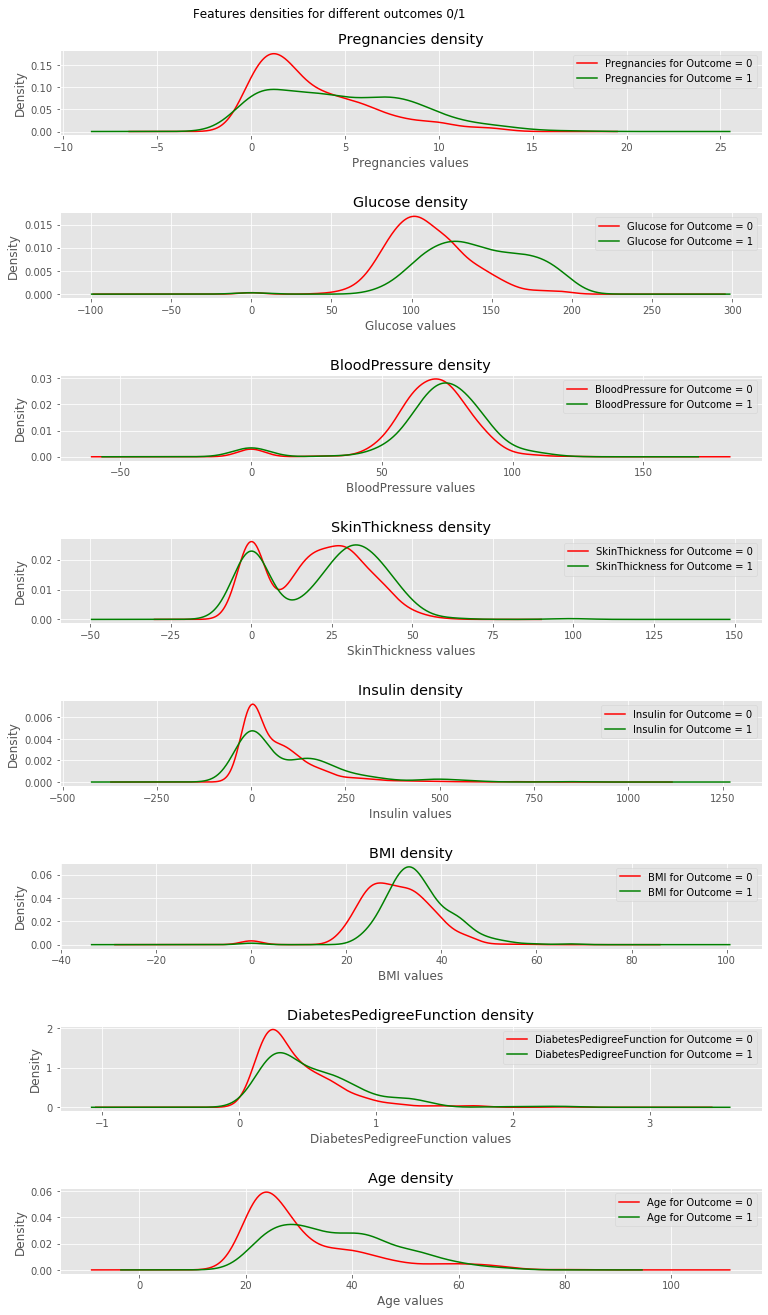

In [535]:
def plot_densities(data):
    '''
    Plot features densities depending on the outcome values
    '''
    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on outcome values 
    outcome_0 = data[data['Outcome'] == 0]
    outcome_1 = data[data['Outcome'] == 1]

    # init figure
    fig, axs = plt.subplots(8, 1)
    fig.suptitle('Features densities for different outcomes 0/1')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)

    # plot densities for outcomes
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        outcome_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for Outcome = 0')
        outcome_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for Outcome = 1')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
    plt.show()
    fig.savefig('densities.png')

# load df
data  = df
names = list(data.columns)

# plot correlation & densities
plot_densities(data)